In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [3]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## 讀入資料集

In [4]:
# Load CIFAR 10(資料集)
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

170500096/170498071 [==============================] - 54s 0us/step


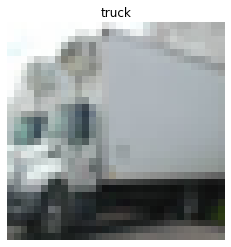

In [5]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title(name_list[y_sample])
plt.axis('off');

In [15]:
CNN_layers = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

In [16]:
FC_layers = [Dense(units=256, activation='relu'),
             Dense(units=10, activation='softmax')]

In [17]:
model = Sequential(CNN_layers + FC_layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 128)         73856     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

## 訓練

In [18]:
model.compile(loss='categorical_crossentropy', 
                optimizer=Adam(),
                metrics=['categorical_accuracy'])

## Fit

In [19]:
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 121s 2ms/sample - loss: 1.8746 - categorical_accuracy: 0.2904 - val_loss: 1.6578 - val_categorical_accuracy: 0.3709
Epoch 2/10
50000/50000 [==============================] - 115s 2ms/sample - loss: 1.5842 - categorical_accuracy: 0.4076 - val_loss: 1.4729 - val_categorical_accuracy: 0.4502
Epoch 3/10
50000/50000 [==============================] - 116s 2ms/sample - loss: 1.4313 - categorical_accuracy: 0.4713 - val_loss: 1.3301 - val_categorical_accuracy: 0.5105
Epoch 4/10
50000/50000 [==============================] - 116s 2ms/sample - loss: 1.3293 - categorical_accuracy: 0.5103 - val_loss: 1.2491 - val_categorical_accuracy: 0.5446
Epoch 5/10
50000/50000 [==============================] - 119s 2ms/sample - loss: 1.2420 - categorical_accuracy: 0.5471 - val_loss: 1.2171 - val_categorical_accuracy: 0.5593
Epoch 6/10
50000/50000 [==============================] - 119s 2ms/sample - loss

## 預測

In [20]:
score_train = model.evaluate(X_train, y_train)
score_test = model.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 13s 1ms/sample - loss: 0.9906 - categorical_accuracy: 0.6449
Train Accuracy: 65.41399955749512
Test Accuracy: 64.49000239372253
